In [3]:
#In this example, a PyTorch fully connected neural network is used as for multivariable classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

#!pip install torch
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris

In [4]:
#load the iris dataset, this time from sklearn datasets
data = load_iris() 

X =data.data
y = data.target

In [5]:
# Convert labels to one-hot encoded format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = torch.tensor(y, dtype=torch.float32)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors, a format optimized for neural networks in PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)

In [12]:
#Define the neural network using a class, for module structure and easier use

#Layers:
#fc1: fully connected layer with input_size input features and hidden_size1 output features
#relu1: rectified linear unit (ReLU) activation function to intriduce non-linearity into the network
#fc2: fully connected layer with hidden_size1 input and hidden_size2 output
#relu2: second ReLU activation function
#fc3: fully connected layer with hidden_size2 input and num_clases output

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

In [21]:
input_size = 4  # Number of features in the input
hidden_size1 = 64  # Number of neurons in the first hidden layer
hidden_size2 = 32  # Number of neurons in the second hidden layer
num_classes = 3  # Number of classes in the output

model = NeuralNetwork(input_size, hidden_size1, hidden_size2, num_classes)

In [22]:
# Define loss function and optimizer
#criterion or loss function: Cross Entropy Loss for multiple class clasification, combines softmax and loglikelihood loss
#optimizer: adam optimizer to minimize loss function, with learning rate of 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [26]:
# Training loop using 500 epochs or iterations trough the dataset
# Print the loss function every 100 epochs, to verify that it is indeed decreasing
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train.squeeze().long())
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0: 
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.0572
Epoch [200/1000], Loss: 0.0554
Epoch [300/1000], Loss: 0.0540
Epoch [400/1000], Loss: 0.0527
Epoch [500/1000], Loss: 0.0514
Epoch [600/1000], Loss: 0.0504
Epoch [700/1000], Loss: 0.0494
Epoch [800/1000], Loss: 0.0486
Epoch [900/1000], Loss: 0.0480
Epoch [1000/1000], Loss: 0.0476


In [27]:
# Evaluate the trained NN
with torch.no_grad(): #disable gradiend calculation since it is not needed in evaluation
    model.eval() #use evaluation behavior in all layers
    test_outputs = model(X_test) #predict on the test data
    _, predicted = torch.max(test_outputs, 1) #find maximum value corresponding to predicted class
    accuracy = torch.sum(predicted == y_test.squeeze().long()).item() / y_test.size(0) #calculate accuracy as classes predicted correctly
    print(f'Accuracy on test set: {accuracy:.4f}')                                     #divided by total classes

Accuracy on test set: 1.0000


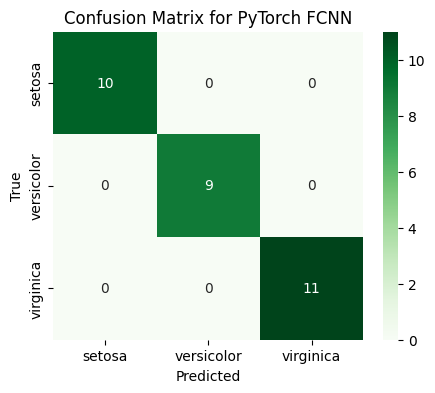

In [28]:
# Creating  a confusion matrix,which compares the y_test and y_pred

# Convert predicted tensor to numpy array
y_pred_np = predicted.numpy()

# Convert labels back to original class labels
y_test_np = y_test.squeeze().numpy()

cm = confusion_matrix(y_test_np, y_pred_np)

class_labels = ['setosa', 'versicolor', 'virginica']

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Greens')

# Add a legend
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for PyTorch FCNN')

# Display the plot
plt.show()